In [19]:
import json
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from ast import literal_eval
import numpy as np

In [20]:
def get_normal_coord(decimal_coords,im_height,im_width):
    ymin, xmin, ymax, xmax = decimal_coords
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    return [int(left),int(right),int(top),int(bottom)]

In [21]:
# enter paratmeters 
ingestion_src = './project-120722-1-ingestion.json'
ModelName = 'faster_rcnn_inception_resnet_v2'
detection_src = './project-120722-1-detections-'+ ModelName +'.csv'
processed_video_src = 'dataset/processed1.avi'
min_score = 0.8

In [22]:
f = open(ingestion_src)
data = json.load(f)
source = data['source-video']
df = pd.read_csv(detection_src,converters={"boxes": literal_eval})

In [23]:
CENTERS = []

cap = cv2.VideoCapture(processed_video_src)
ret, frame = cap.read()
im_height,im_width,_ = frame.shape
cap = cv2.VideoCapture(processed_video_src)

frameNo = 0 
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
else:       
    
    while(cap.isOpened()):
        ret, frame = cap.read()
        
        if ret == True:
            pass
        else: 
            break        
        im_height,im_width,_ = frame.shape
        image_np = frame.copy()
        
        frameNo = frameNo + 1   
        # Get detections here 
        df_currentFrame = df[df['frame']==frameNo]
        for ind,row in df_currentFrame.iterrows():
#         # DETECTIONS 
            detections = row['boxes']
#             print(detections)
            score = row['scores']
            
            if score>min_score:
#             # plot boxes on 
                left, right, top, bottom = get_normal_coord(detections,im_height,im_width)
#                 image_np = cv2.rectangle(image_np, (int(left),int(top)), (int(right),int(bottom)), (0,0,255), 2)
#                 CENTERS.append((int(right-(right+left)/2),int(bottom-(top+bottom)/2)))
                CENTERS.append((int((right+left)/2),int((top+bottom)/2)))

       

In [24]:
CENTERS

[(314, 931),
 (913, 154),
 (1499, 111),
 (1686, 198),
 (1662, 736),
 (831, 333),
 (753, 320),
 (1835, 271),
 (1648, 992),
 (1179, 37),
 (929, 503),
 (329, 388),
 (1008, 65),
 (1342, 23),
 (1380, 69),
 (292, 937),
 (916, 152),
 (1662, 739),
 (1686, 198),
 (1501, 112),
 (837, 330),
 (917, 506),
 (1841, 263),
 (760, 319),
 (1178, 37),
 (326, 356),
 (1652, 1000),
 (1011, 64),
 (1341, 23),
 (698, 1039),
 (265, 954),
 (1686, 192),
 (896, 528),
 (1663, 757),
 (924, 149),
 (853, 324),
 (1846, 258),
 (294, 413),
 (1505, 107),
 (772, 315),
 (349, 318),
 (1175, 38),
 (1018, 62),
 (730, 1027),
 (1409, 54),
 (1668, 782),
 (231, 965),
 (879, 536),
 (932, 147),
 (1686, 185),
 (784, 300),
 (869, 313),
 (1508, 100),
 (746, 1018),
 (1854, 256),
 (1029, 62),
 (259, 385),
 (1169, 40),
 (1425, 55),
 (361, 315),
 (1341, 22),
 (1675, 794),
 (1683, 183),
 (194, 979),
 (949, 140),
 (881, 311),
 (799, 296),
 (1510, 96),
 (863, 540),
 (239, 418),
 (381, 281),
 (1163, 41),
 (768, 1007),
 (1038, 58),
 (230, 381),


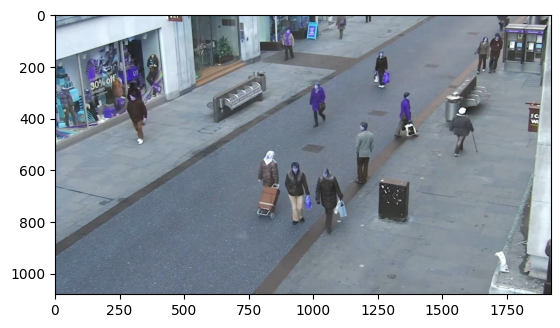

In [25]:
plt.imshow(image_np)

In [41]:
image_np2 = image_np.copy()
for center in CENTERS:
    
    
        # Center coordinates
    center_coordinates = (120, 50)

    # Radius of circle
    radius = 5

    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = -1
    image_np2 = cv2.circle(image_np2, center, radius, color, thickness)
    

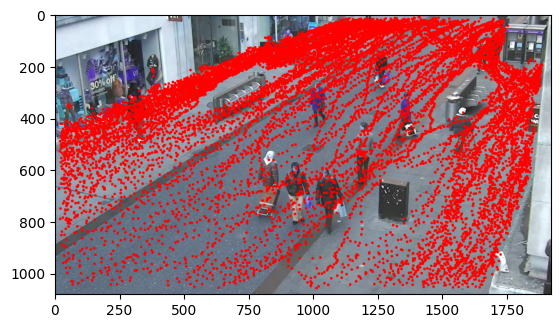

In [42]:
plt.imshow(image_np2)

In [43]:
from PIL import Image
from PIL import ImageDraw


In [44]:
im = Image.fromarray(image_np2)

In [45]:
canvas = ImageDraw.Draw(im)
# Now I draw the circle:
p_x, p_y = 80, 80
canvas.ellipse((p_x - 5, p_y - 5, p_x + 5, p_y + 5), fill=(255, 0, 0, 100))

In [46]:
del canvas
im.save('testHeatmap.png', 'PNG')